## Analyze rates_delay_loss made by test_env.py
* ex. all traces (train one by one - in any order (random, gap to baseline etc.))
* The important thing is that you have tested on multiple traces (they are keys in l_rate)

In [1]:
import pandas as pd
import numpy as np
from plot_cdf import plot_cdf, plot_cdf_multiple
import matplotlib.pyplot as plt
import json
import os
import glob

In [14]:
# dataset = "ghent"
# conf_name = f"test_random_traces_ghent_v2"

dataset = "norway"
conf_name = f"random_norway_max_200_300"

In [15]:
prefix = "../output/rates_delay_loss_test_"
suffix = ".pickle"

pickle_path = prefix+conf_name+suffix
print(pickle_path)
l_rate = pd.read_pickle(pickle_path)
time_step = 200
reward_profile=0
print(time_step)

../output/rates_delay_loss_test_random_norway_max_200_300.pickle
200


In [16]:
len(l_rate.keys())

29

Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-22_0800CET.json  |  tram_2010-12-22_0800CET


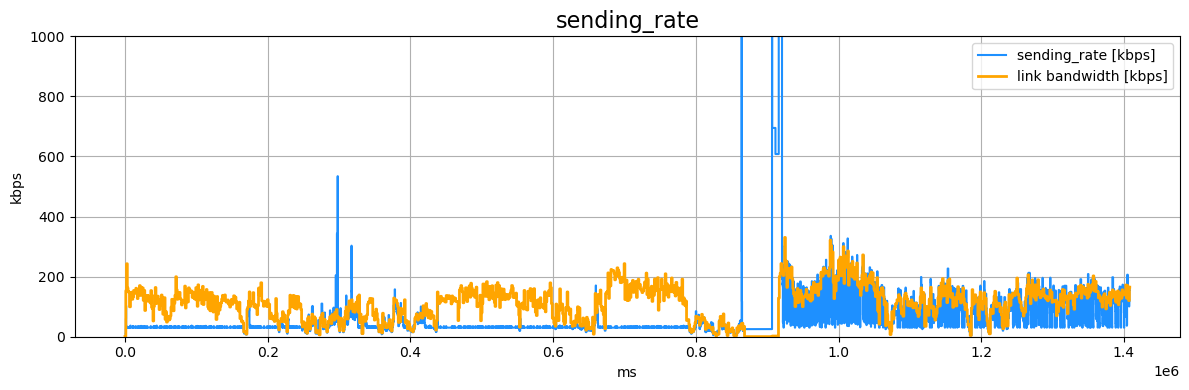



Trace name:  ../new_data/Norway_3G_data_json/metro_2010-09-14_1038CEST.json  |  metro_2010-09-14_1038CEST


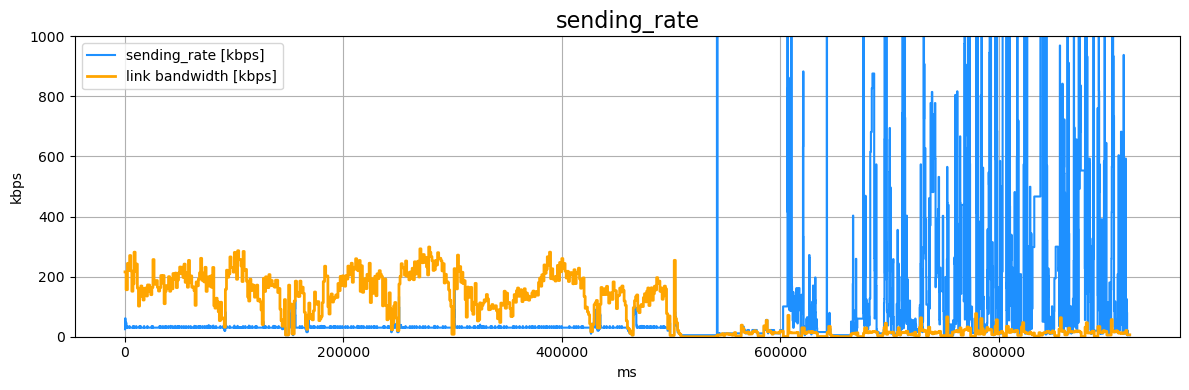



Trace name:  ../new_data/Norway_3G_data_json/metro_2010-10-18_0951CEST.json  |  metro_2010-10-18_0951CEST


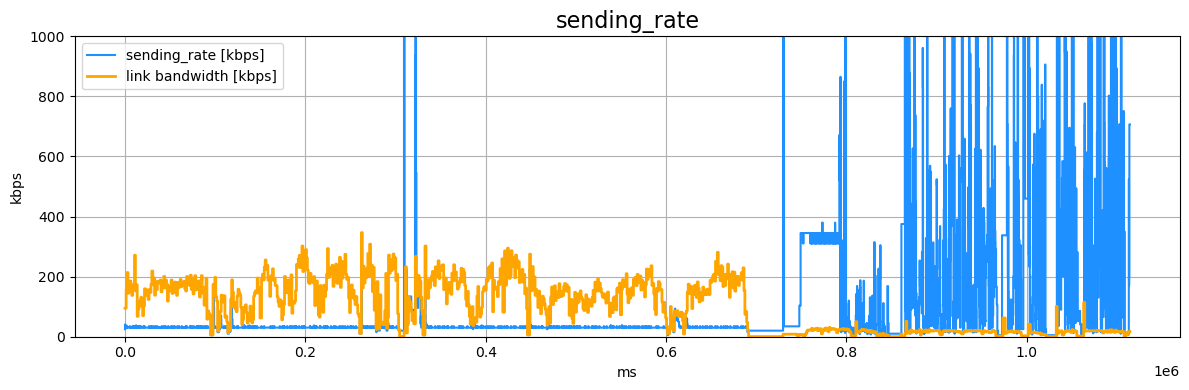



Trace name:  ../new_data/Norway_3G_data_json/bus_2010-11-10_1726CET.json  |  bus_2010-11-10_1726CET


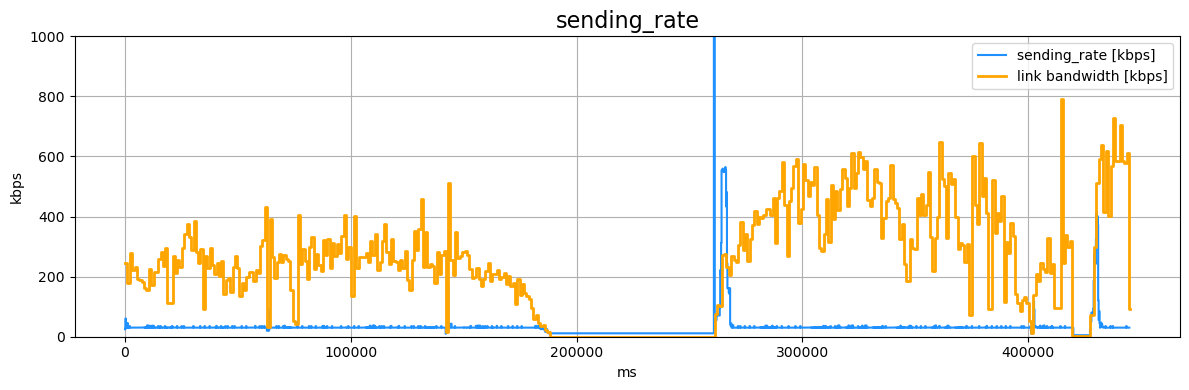



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-21_1225CET.json  |  tram_2010-12-21_1225CET


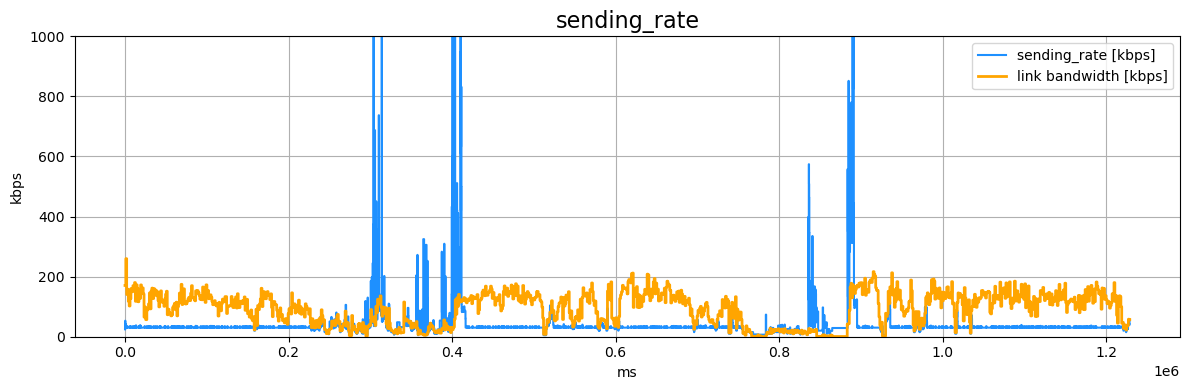



Trace name:  ../new_data/Norway_3G_data_json/tram_2011-02-02_1345CET.json  |  tram_2011-02-02_1345CET


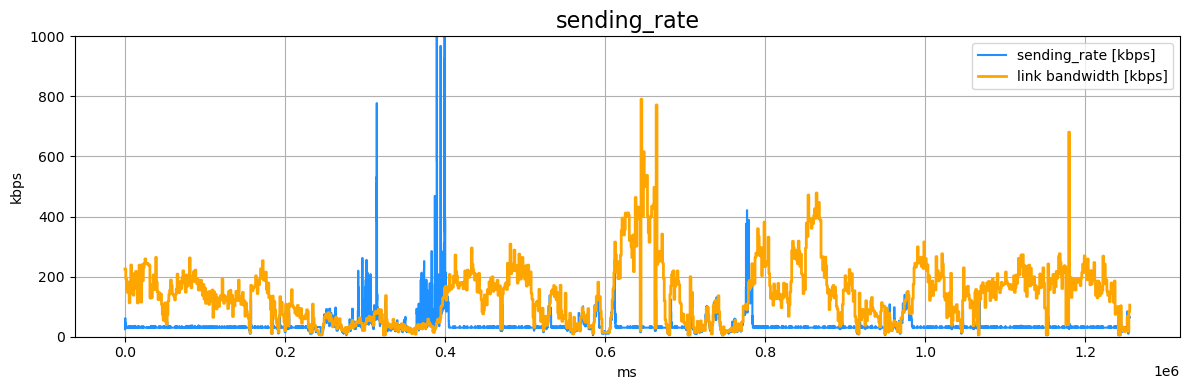



Trace name:  ../new_data/Norway_3G_data_json/car_2011-02-14_2051CET.json  |  car_2011-02-14_2051CET


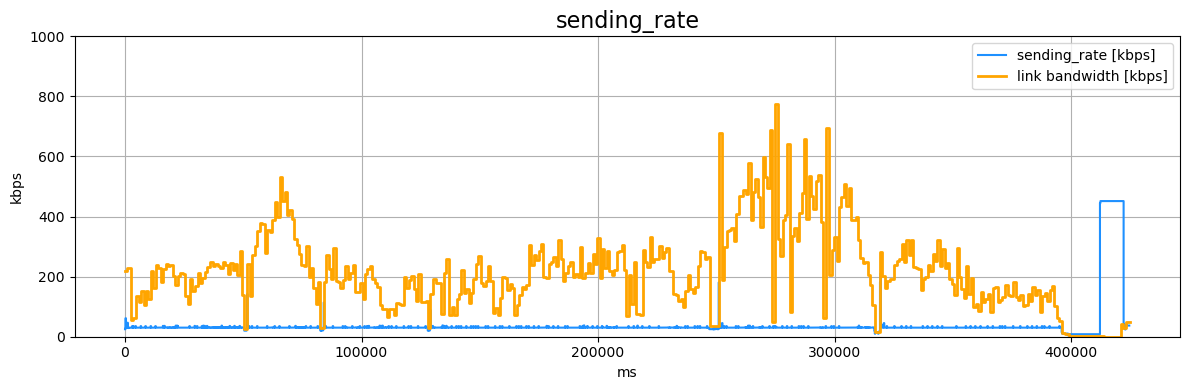



Trace name:  ../new_data/Norway_3G_data_json/bus_2011-01-30_1323CET.json  |  bus_2011-01-30_1323CET


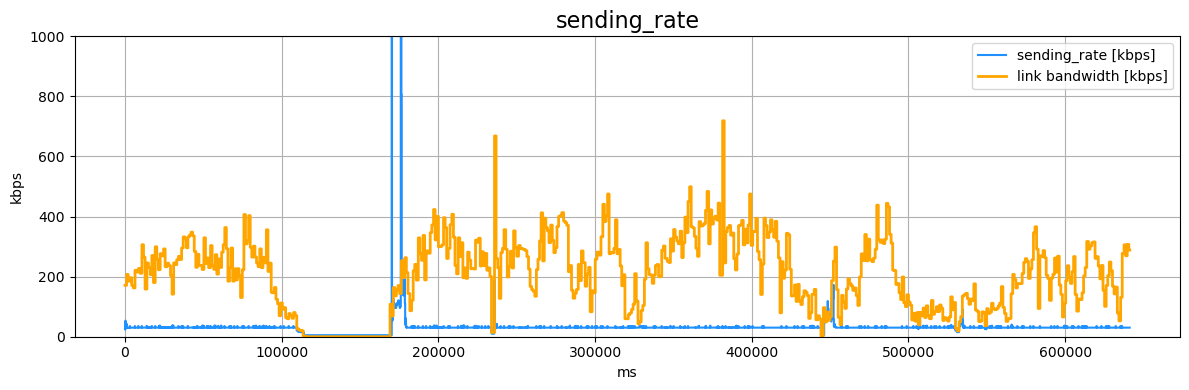



Trace name:  ../new_data/Norway_3G_data_json/metro_2010-09-13_1046CEST.json  |  metro_2010-09-13_1046CEST


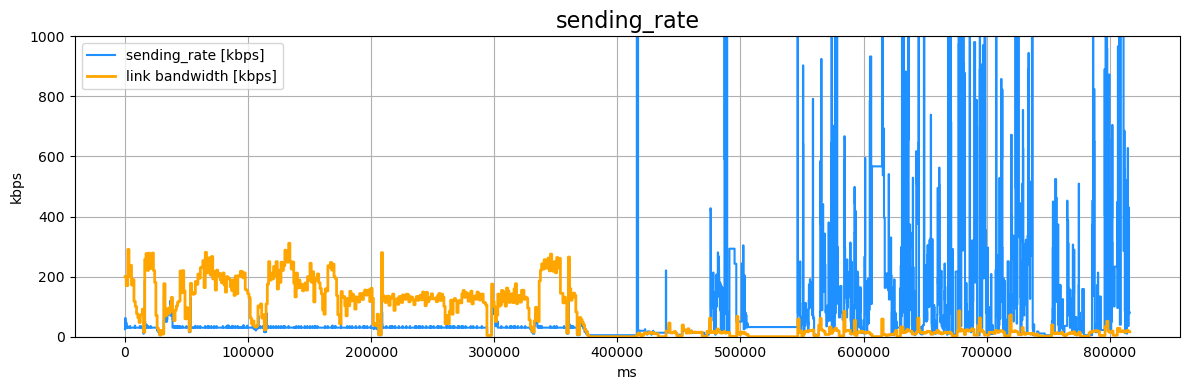



Trace name:  ../new_data/Norway_3G_data_json/metro_2011-02-01_1800CET.json  |  metro_2011-02-01_1800CET


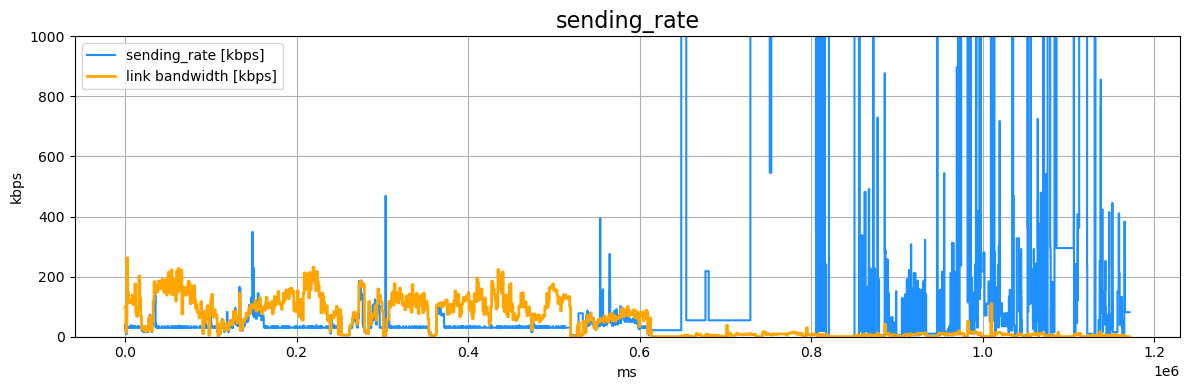



Trace name:  ../new_data/Norway_3G_data_json/metro_2011-02-02_1251CET.json  |  metro_2011-02-02_1251CET


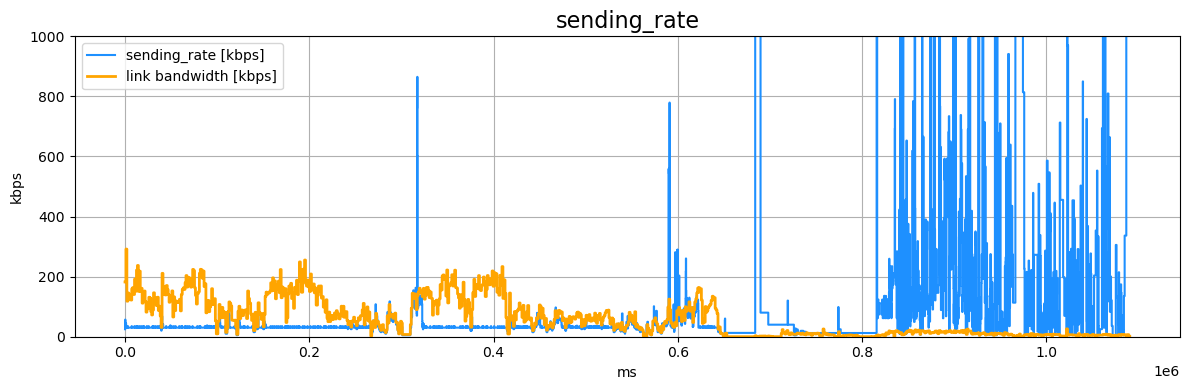



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-16_1215CET.json  |  tram_2010-12-16_1215CET


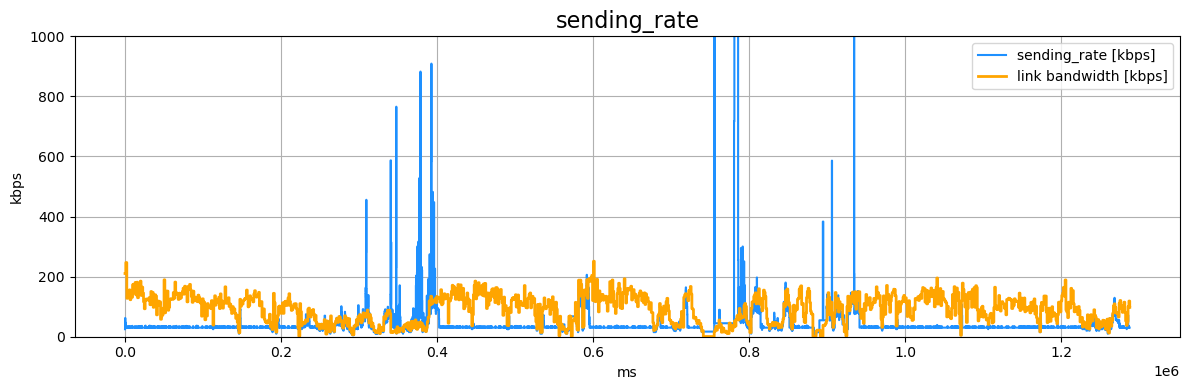



Trace name:  ../new_data/Norway_3G_data_json/train_2011-02-11_1618CET.json  |  train_2011-02-11_1618CET


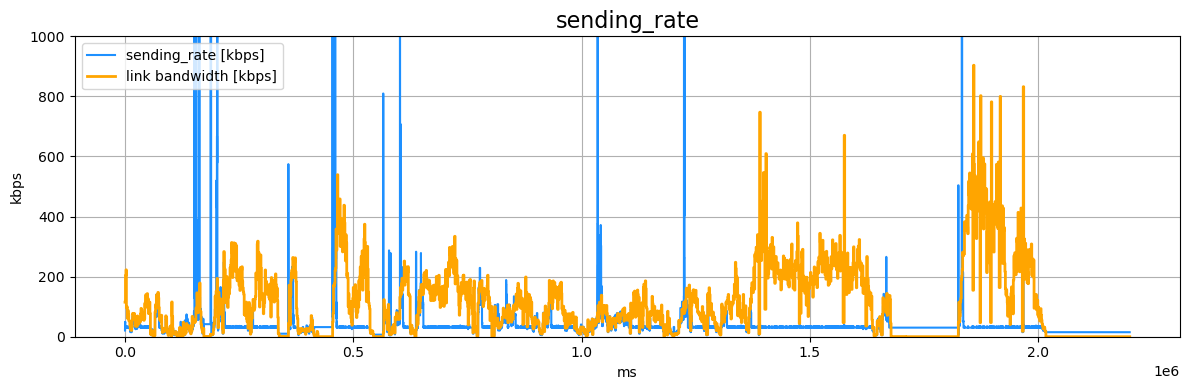



Trace name:  ../new_data/Norway_3G_data_json/tram_2011-01-05_0819CET.json  |  tram_2011-01-05_0819CET


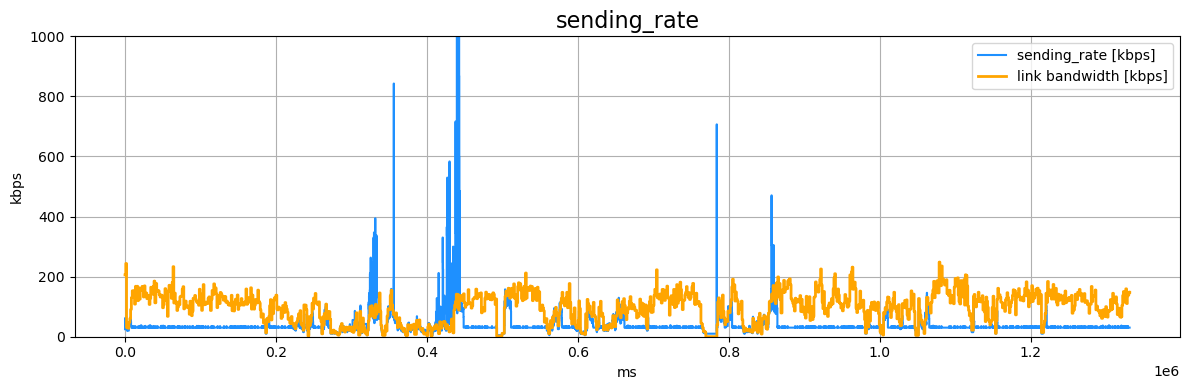



Trace name:  ../new_data/Norway_3G_data_json/tram_2011-01-06_0749CET.json  |  tram_2011-01-06_0749CET


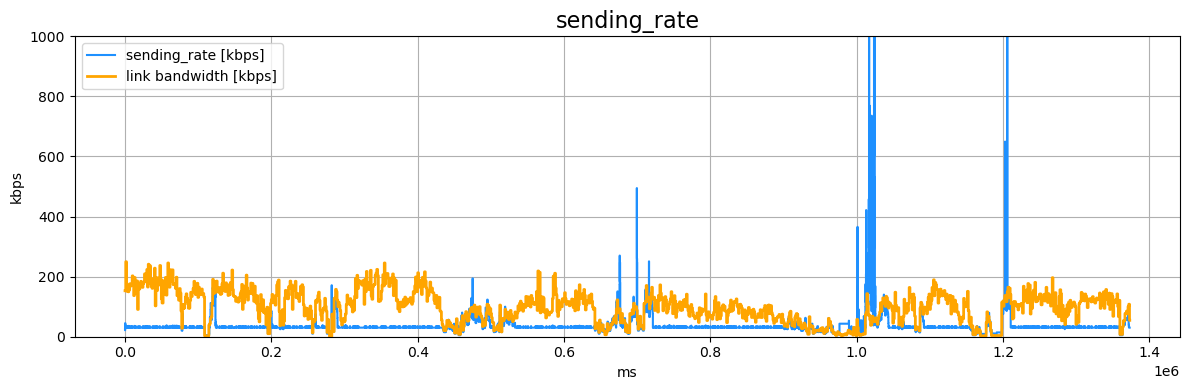



Trace name:  ../new_data/Norway_3G_data_json/bus_2010-09-29_1628CEST.json  |  bus_2010-09-29_1628CEST


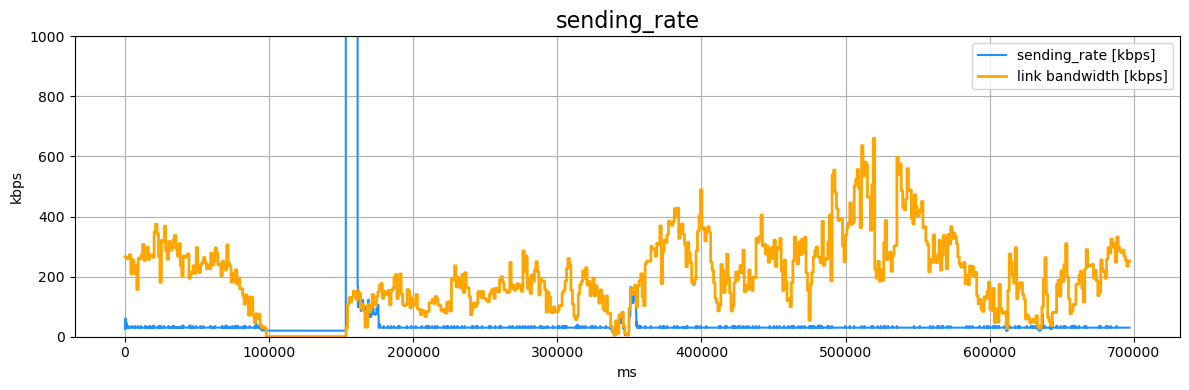



Trace name:  ../new_data/Norway_3G_data_json/metro_2010-09-13_1003CEST.json  |  metro_2010-09-13_1003CEST


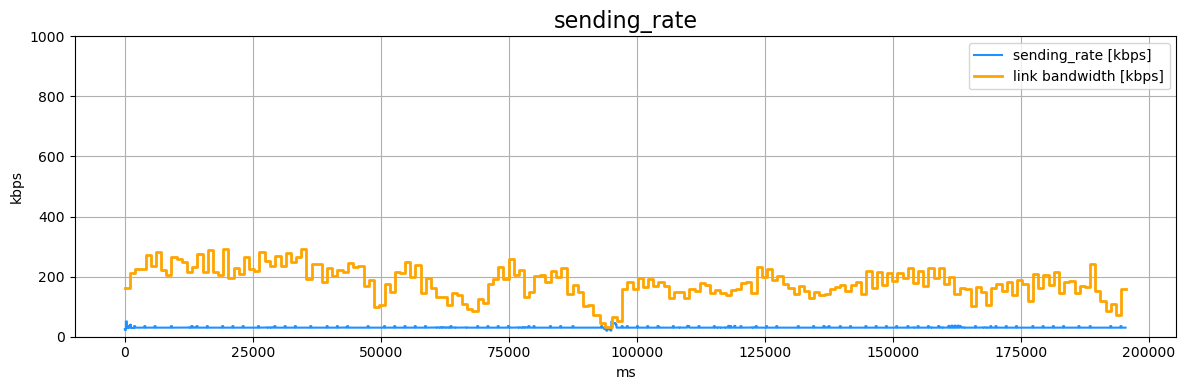



Trace name:  ../new_data/Norway_3G_data_json/bus_2011-01-29_1125CET.json  |  bus_2011-01-29_1125CET


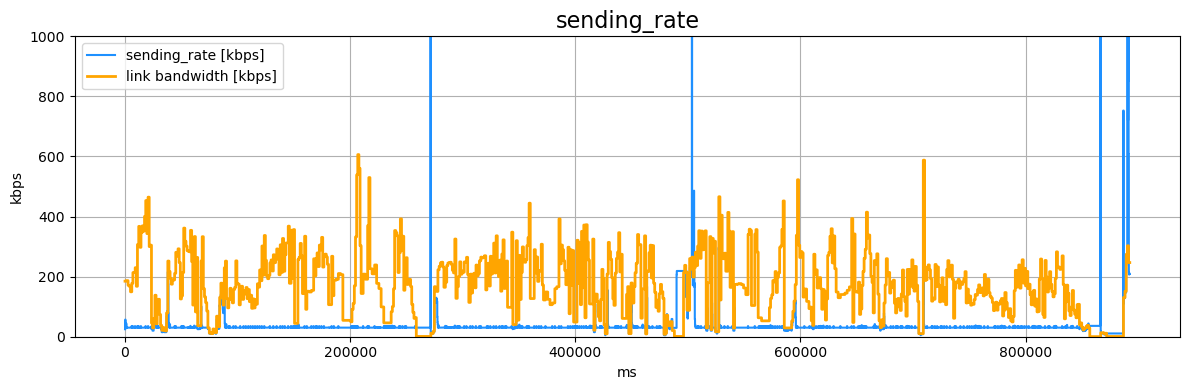



Trace name:  ../new_data/Norway_3G_data_json/train_2011-02-11_1729CET.json  |  train_2011-02-11_1729CET


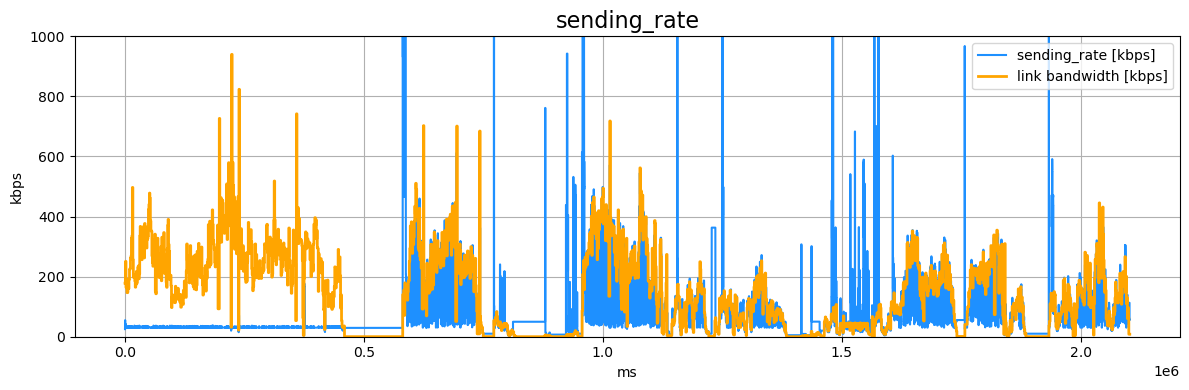



Trace name:  ../new_data/Norway_3G_data_json/metro_2011-01-31_1935CET.json  |  metro_2011-01-31_1935CET


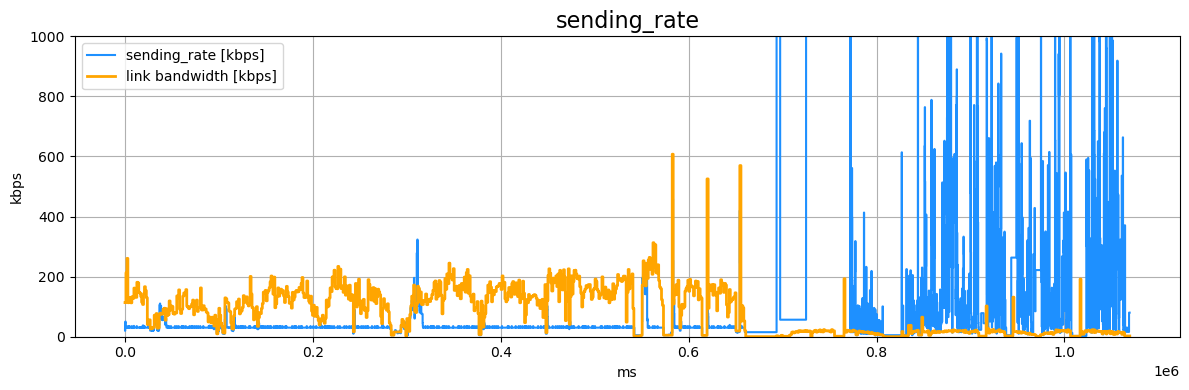



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-09_1310CET.json  |  tram_2010-12-09_1310CET


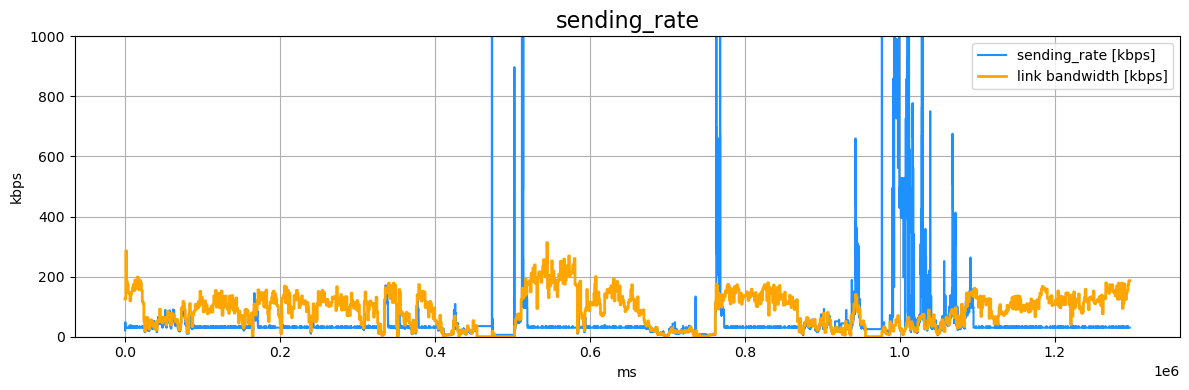



Trace name:  ../new_data/Norway_3G_data_json/car_2011-02-14_2108CET.json  |  car_2011-02-14_2108CET


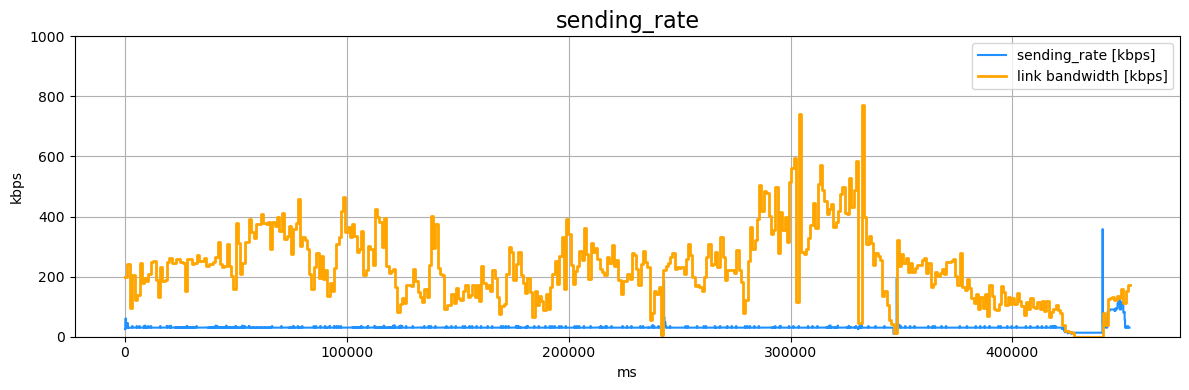



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-16_1125CET.json  |  tram_2010-12-16_1125CET


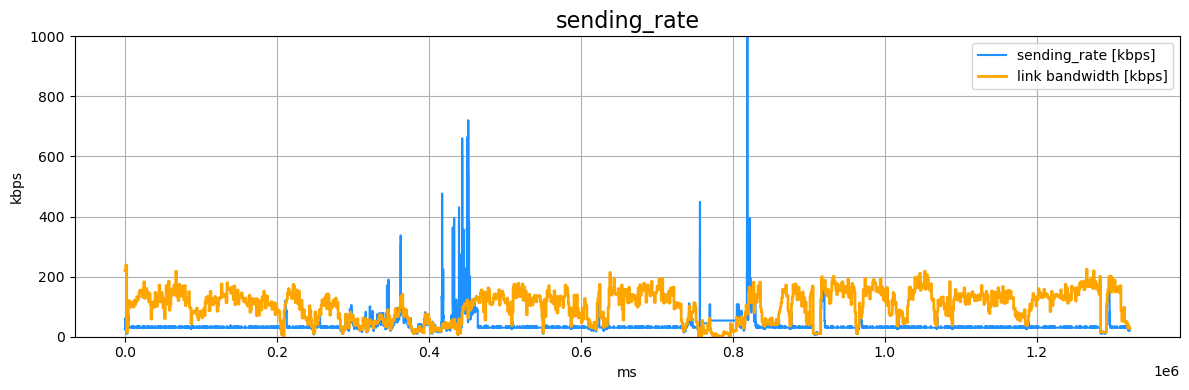



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-11-23_1515CET.json  |  tram_2010-11-23_1515CET


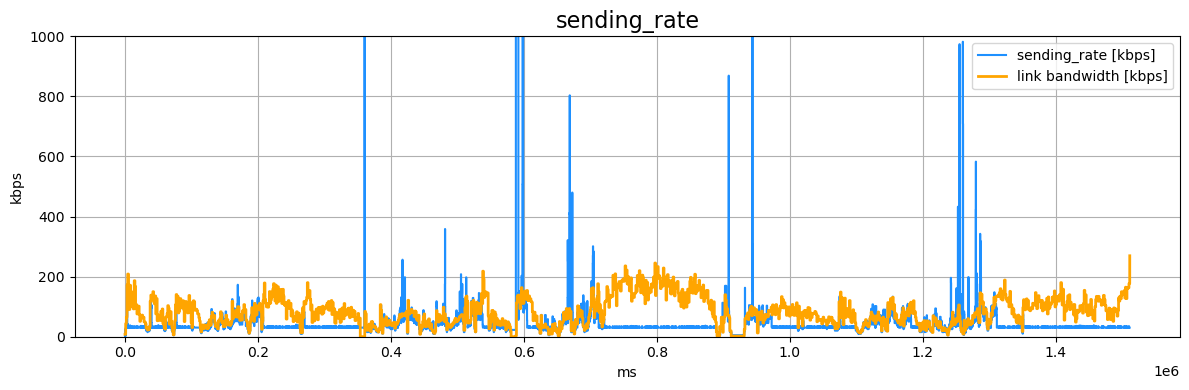



Trace name:  ../new_data/Norway_3G_data_json/tram_2011-01-31_2032CET.json  |  tram_2011-01-31_2032CET


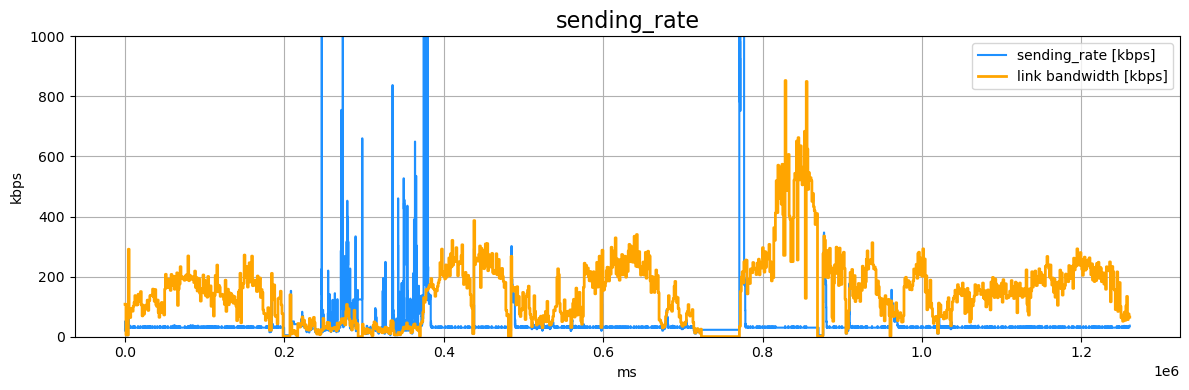



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-11-23_1541CET.json  |  tram_2010-11-23_1541CET


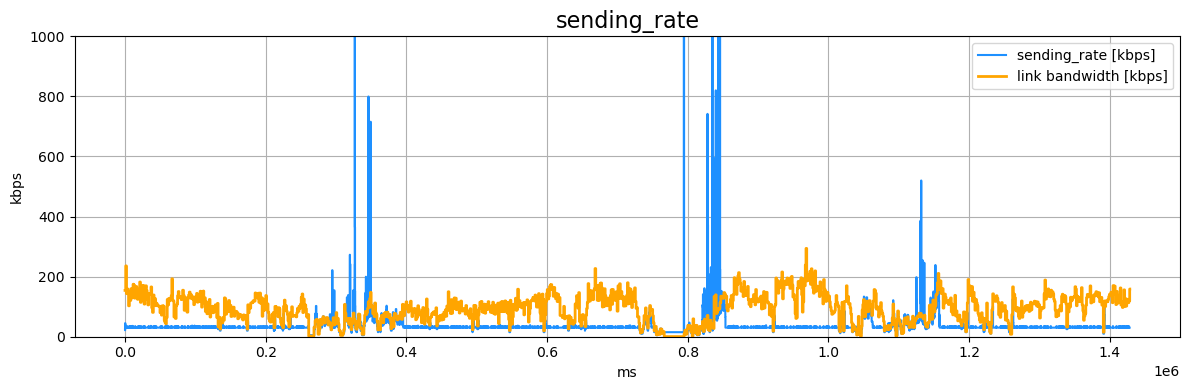



Trace name:  ../new_data/Norway_3G_data_json/tram_2010-12-16_1149CET.json  |  tram_2010-12-16_1149CET


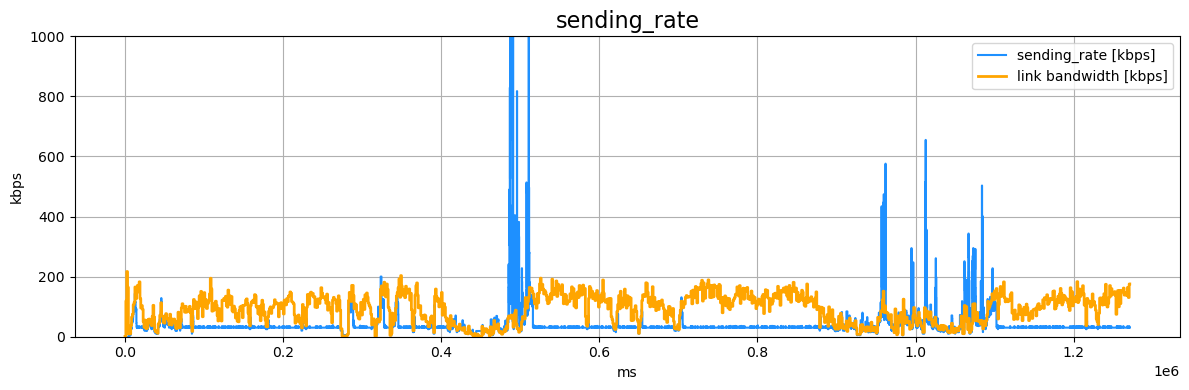



Trace name:  ../new_data/Norway_3G_data_json/tram_2011-01-31_1045CET.json  |  tram_2011-01-31_1045CET


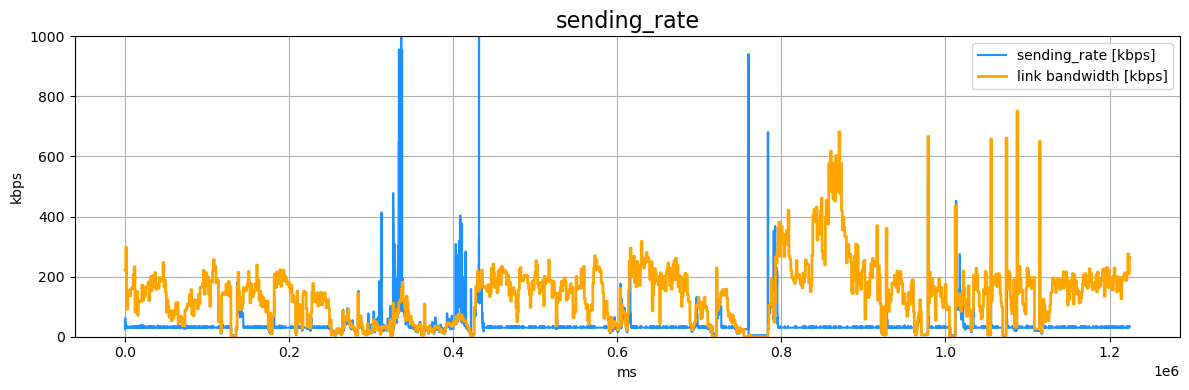



Trace name:  ../new_data/Norway_3G_data_json/metro_2010-09-21_0742CEST.json  |  metro_2010-09-21_0742CEST


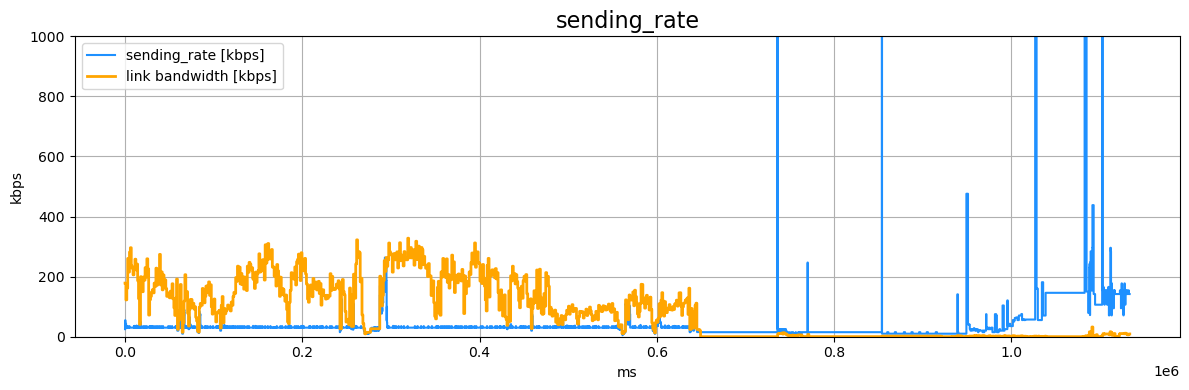

In [17]:
plot_gcc = False
len_traces = [] #length of each trace in ms

for key in l_rate.keys():
    
#     print(f"Trace: {key}")
    colors = iter(["dodgerblue", "teal", "indianred", "olive", "yellow", "green"])

    # for metric in ["bandwidth_prediction", "receiving_rate", "sending_rate", "delay", "loss_ratio", "reward"]:
    for metric in ["sending_rate"]: # "delay", "loss_ratio", "reward"
        #Define capacity
        
        if dataset == "opennetlab":
            trace_name = "../" + key.split("/")[1] + "/" + key.split("/")[2]
            REAL_NAME = ...
        elif dataset == "ghent":
            trace_name = os.path.join("../new_data/logs_all_4G_Ghent_json", os.path.basename(key))
            REAL_NAME = os.path.basename(key).split(".")[0]
        elif dataset == "norway":
            trace_name = os.path.join("../new_data/Norway_3G_data_json", os.path.basename(key))
            REAL_NAME = os.path.basename(key).split(".")[0]
        else:
            print("Wrong dataset name")
    
        print("Trace name: ", trace_name, " | ", REAL_NAME)
        
        if plot_gcc:
            pickle_path_gcc = f"../apply_model/results_gcc/rates_delay_loss_gcc_{REAL_NAME}.pickle"
            l_rate_gcc = pd.read_pickle(pickle_path_gcc)

            if l_rate_gcc["trace_name"] != REAL_NAME:
                print("Trace not the same as GCC")

        with open(trace_name, "r") as f:
            d = json.load(f)

        df = pd.DataFrame(d["uplink"]["trace_pattern"])
        time = [0] + list(df["duration"].cumsum())
        capacities = [df["capacity"].iloc[0]] + list(df["capacity"])

        len_traces.append(time[-1])
        

        df_rate = pd.DataFrame(l_rate[key][metric], columns=[metric])
        if plot_gcc and (metric != "reward"):
            df_rate_gcc = pd.DataFrame(l_rate_gcc[metric], columns=[metric])
            df_rate = df_rate.join(df_rate_gcc, rsuffix="_gcc")

        t = np.arange(len(df_rate))*time_step
        df_rate["time"] = t
        df_rate.set_index("time", inplace=True)


        if metric in ["bandwidth_prediction", "sending_rate", "receiving_rate"]:

            plt.figure(figsize=(12,4))
            plt.title(metric, fontsize=16)
            # color=next(colors)
            plt.step(df_rate.index, df_rate[metric]/1000, label=f"{metric} [kbps]", color="dodgerblue")
            plt.step(time, capacities, lw=2, label="link bandwidth [kbps]", color="orange")
            if plot_gcc and (metric != "reward"):
                plt.step(df_rate.index, df_rate[f"{metric}_gcc"]/1000, label=f"{metric} GCC [kbps]", color="red")
            plt.legend()
            plt.ylabel("kbps")
            plt.xlabel("ms")
            plt.grid()
            
            if dataset == "norway":
                plt.ylim((0, 1000))
            elif dataset == "ghent":
                plt.ylim((0, 10000))
            else:
                if REAL_NAME == "WIRED_200kbps":
                    plt.xlim((0, 50000))
                if REAL_NAME == "WIRED_35mbps":
                    plt.ylim((0, 40000))
                elif REAL_NAME == "4G_700kbps":
                    plt.ylim(0, 1500)
                elif REAL_NAME == "4G_3mbps":
                    plt.ylim(0,8000)
                elif REAL_NAME == "4G_500kbps":
                    plt.ylim(0,1600)
                elif REAL_NAME == "5G_12mbps":
                    plt.ylim(0,20000)
                elif REAL_NAME == "5G_13mbps":
                    plt.ylim(0,20000)
            plt.tight_layout()

        else:
            plt.figure(figsize=(12,4))
            plt.title(metric, fontsize=16)
            plt.step(df_rate.index, df_rate[metric], label=f"{metric}", color="dodgerblue")
            if plot_gcc and (metric != "reward"):
                plt.step(df_rate.index, df_rate[f"{metric}_gcc"], label=f"{metric} GCC", color="red")
            plt.ylabel(metric)
            plt.xlabel("ms")
            plt.legend()
            plt.grid()
            if metric == "reward":
                plt.tight_layout()
                plt.ylim(-1.05,1.05)
#                 plt.savefig(f"./plots/reward_{REAL_NAME}_{reward_profile}.png")
            elif metric in ["Rl", "Ru", "Rd"]:
                plt.ylim(-1.05,1.05)
            
        plt.show()
        print("\n")

In [6]:
len(len_traces)

0

In [16]:
import numpy as np
max_len_trace = np.max(len_traces)
print("Time of longest trace: ", max_len_trace, "ms or ", max_len_trace/1000, "s or", (max_len_trace/1000)/60, "min")

Time of longest trace:  12223704 ms or  12223.704 s or 203.7284 min


In [24]:
time_step = 200
print("Number of steps when running tests should be", max_len_trace//time_step)

Number of steps when running tests should be 61118


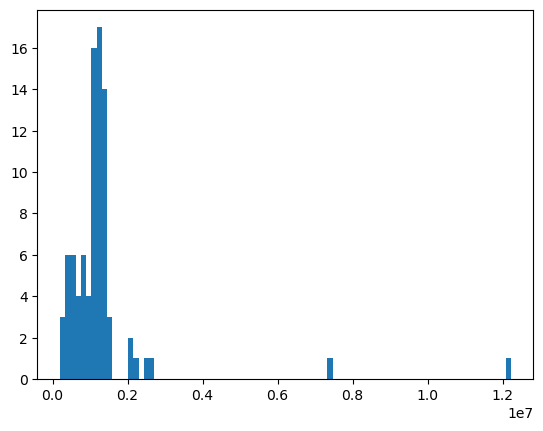

In [31]:
a = plt.hist(len_traces, bins=len(len_traces))
# plt.xlim(0,2500000)

In [29]:
2500000 // 200

12500